# *Predicting House Sale Prices*

***In this project, we will predict a House's Sale Price using its attributes. The data set we will be working with contains housing data for the city of Ames, Iowa, United States from 2006 to 2010. For each house, we have information such as Lot Area, Garage Area, Year Built, and more.***

[Download](https://dsserver-prod-resources-1.s3.amazonaws.com/235/AmesHousing.txt)<br>
[Documentation](https://s3.amazonaws.com/dq-content/307/data_description.txt)

***We will be using Linear Regression algorithm to predict a House's price accurately.***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.style as style
style.use('fivethirtyeight')

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

pd.set_option('display.max_columns', 500)
data = pd.read_csv('AmesHousing.txt', delimiter='\t')


data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


**Method to quickly get info related to a dataframe**

In [2]:
def data_shape(data):
    print('Shape')
    print(data.shape)
    print(len(str(data.shape)) * "-")
    
    print('\nData Types')
    print(data.dtypes.value_counts())
    print(len(str(data.shape)) * "-")
    
    print('\nColumns : Null Counts')
    null_counts = data.isnull().sum()
    print(null_counts[null_counts > 0])
    

data_shape(data)

Shape
(2930, 82)
----------

Data Types
object     43
int64      28
float64    11
dtype: int64
----------

Columns : Null Counts
Lot Frontage       490
Alley             2732
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


### Transforming Features

- Creating more useful columns from existing Columns<br>
- Dropping columns which are not useful or leak information about the sale<br>
- Dropping Columns which have more then 5% missing Values

In [3]:
# Creating more useful columns from existing Columns
df = data.copy()
df['Years_since_remodelled'] = df['Yr Sold'] - df['Year Remod/Add']
df['Years_since_sold'] = df['Yr Sold'] - df['Year Built']
df = df[(df['Years_since_remodelled'] >= 0)]
df = df[(df['Years_since_sold'] >= 0)]

# Dropping columns which are not useful or leak information about the sale
df.drop(['Sale Condition', 'Sale Type', 'Mo Sold', 'Yr Sold', 'PID', 'Order', 
           'Year Remod/Add', 'Year Built'], axis=1, inplace=True)

# Dropping Columns which have more then 5% missing Values
null_counts = df.isnull().sum()
df.drop(null_counts[null_counts > df.shape[0]*0.05].index, axis=1, inplace=True)

data_shape(df)
df.head()

Shape
(2927, 65)
----------

Data Types
object     32
int64      24
float64     9
dtype: int64
----------

Columns : Null Counts
Mas Vnr Type      23
Mas Vnr Area      23
Bsmt Qual         80
Bsmt Cond         80
Bsmt Exposure     83
BsmtFin Type 1    80
BsmtFin SF 1       1
BsmtFin Type 2    81
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Electrical         1
Bsmt Full Bath     2
Bsmt Half Bath     2
Garage Cars        1
Garage Area        1
dtype: int64


,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,Years_since_remodelled,Years_since_sold
0,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,2.0,528.0,P,210,62,0,0,0,0,0,215000,50,50
1,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,1.0,730.0,Y,140,0,0,0,120,0,0,105000,49,49
2,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,1.0,312.0,Y,393,36,0,0,0,0,12500,172000,52,52
3,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,2.0,522.0,Y,0,0,0,0,0,0,0,244000,42,42
4,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,2.0,482.0,Y,212,34,0,0,0,0,0,189900,12,13


### Feature Engineering 

- Imputing missing values with mode for numerical columns
- Finding Highly correlated columns to target column
- Dropping numerical columns with high collinearity
- Dropping Text Columns with missing Values
- Converting nominal columns into dummy variables

> Numerical columns

In [4]:
numerical_cols = df[df.dtypes[df.dtypes != 'object'].index].copy()
data_shape(numerical_cols)

Shape
(2927, 33)
----------

Data Types
int64      24
float64     9
dtype: int64
----------

Columns : Null Counts
Mas Vnr Area      23
BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Bsmt Full Bath     2
Bsmt Half Bath     2
Garage Cars        1
Garage Area        1
dtype: int64


- Imputing missing values with mode

In [5]:
numerical_cols.fillna(numerical_cols.mode().iloc[0], inplace=True)
data_shape(numerical_cols)

Shape
(2927, 33)
----------

Data Types
int64      24
float64     9
dtype: int64
----------

Columns : Null Counts
Series([], dtype: int64)


- Finding Highly correlated columns to target Column
- Dropping columns with high collinearilty


16
Open Porch SF             0.316262
Wood Deck SF              0.328183
BsmtFin SF 1              0.439284
Fireplaces                0.474831
TotRms AbvGrd             0.498574
Mas Vnr Area              0.506983
Years_since_remodelled    0.534985
Full Bath                 0.546118
Years_since_sold          0.558979
1st Flr SF                0.635185
Garage Area               0.641425
Total Bsmt SF             0.644012
Garage Cars               0.648361
Gr Liv Area               0.717596
Overall Qual              0.801206
SalePrice                 1.000000
Name: SalePrice, dtype: float64


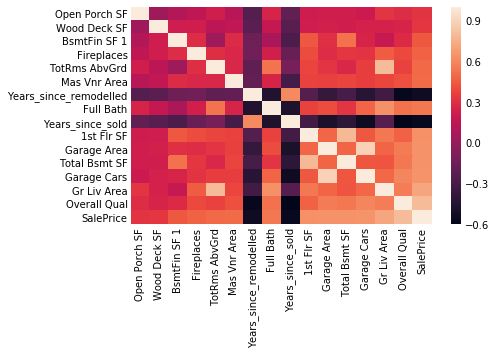

In [6]:
correlation_matrix = numerical_cols.corr().abs()
sorted_corrs = correlation_matrix.SalePrice.sort_values()
strong_corrs = sorted_corrs[sorted_corrs > 0.3]

print(len(strong_corrs))
print(strong_corrs)

sns.heatmap(numerical_cols[strong_corrs.index].corr())
plt.show()

In [7]:
strong_corrs.drop(['Garage Cars', 'Total Bsmt SF', 'TotRms AbvGrd'], inplace=True)
high_corr_num_cols = numerical_cols[strong_corrs.index]

data_shape(high_corr_num_cols)
high_corr_num_cols.head()

Shape
(2927, 13)
----------

Data Types
int64      10
float64     3
dtype: int64
----------

Columns : Null Counts
Series([], dtype: int64)


,Open Porch SF,Wood Deck SF,BsmtFin SF 1,Fireplaces,Mas Vnr Area,Years_since_remodelled,Full Bath,Years_since_sold,1st Flr SF,Garage Area,Gr Liv Area,Overall Qual,SalePrice
0,62,210,639.0,2,112.0,50,1,50,1656,528.0,1656,6,215000
1,0,140,468.0,0,0.0,49,1,49,896,730.0,896,5,105000
2,36,393,923.0,0,108.0,52,1,52,1329,312.0,1329,6,172000
3,0,0,1065.0,2,0.0,42,2,42,2110,522.0,2110,7,244000
4,34,212,791.0,1,0.0,12,2,13,928,482.0,1629,5,189900


> Text Columns

- Dropping Columns with missing values

In [8]:
text_cols = df[df.dtypes[df.dtypes == 'object'].index].copy()

# Dropping Text Columns with missing values
null_cols = text_cols.isnull().sum()
text_cols.drop(null_cols[null_cols > 0].index, axis=1, inplace=True)
data_shape(text_cols)

Shape
(2927, 25)
----------

Data Types
object    25
dtype: int64
----------

Columns : Null Counts
Series([], dtype: int64)


- Converting nominal columns to dummy variables

In [9]:
## Nominal columns from the documentation
nominal_cols = ['MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 
                'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Roof Style', 'Roof Mat1', 
                'Exterior 1st',  'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air'] 

nominal_num_col = ['MS SubClass']

## Categorical Text Data
common_columns = [x for x in text_cols if x in nominal_cols]
categories_per_col = {x:len(text_cols[x].value_counts()) for x in common_columns}
col_less_then_thresh = [x for x in categories_per_col if categories_per_col[x] <= 10]

text_cols = text_cols[col_less_then_thresh].astype('category') 
categorical_text_data = pd.get_dummies(text_cols)

## Categorical Numerical Data
common_columns = [x for x in numerical_cols if x in nominal_num_col]
numerical_cols[common_columns] = numerical_cols[common_columns].astype('category')      
categorical_num_data = pd.get_dummies(numerical_cols.select_dtypes(include=['category']))

- Concatenating all the dataframes together

In [10]:
final_data = pd.concat([high_corr_num_cols, categorical_text_data, categorical_num_data], axis=1)
data_shape(final_data)
final_data.head()

Shape
(2927, 97)
----------

Data Types
uint8      84
int64      10
float64     3
dtype: int64
----------

Columns : Null Counts
Series([], dtype: int64)


,Open Porch SF,Wood Deck SF,BsmtFin SF 1,Fireplaces,Mas Vnr Area,Years_since_remodelled,Full Bath,Years_since_sold,1st Flr SF,Garage Area,Gr Liv Area,Overall Qual,SalePrice,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_N,Central Air_Y,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190
0,62,210,639.0,2,112.0,50,1,50,1656,528.0,1656,6,215000,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,140,468.0,0,0.0,49,1,49,896,730.0,896,5,105000,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,36,393,923.0,0,108.0,52,1,52,1329,312.0,1329,6,172000,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1065.0,2,0.0,42,2,42,2110,522.0,2110,7,244000,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,34,212,791.0,1,0.0,12,2,13,928,482.0,1629,5,189900,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


## Creating a Pipeline with adjustable parameters

When we did our data cleaning, we decided to remove columns that had more than 5% missing values. We can incorporate our this into a function as an adjustable parameter. In addition, this function will perform all the data cleaning operations done above.

In [11]:
def transform_features(df, percent_missing=0.05):
    
    # Adding relevant features
    df['Years_since_remodelled'] = df['Yr Sold'] - df['Year Remod/Add']
    df['Years_since_sold'] = df['Yr Sold'] - df['Year Built']
    df = df[(df['Years_since_remodelled'] >= 0)]
    df = df[(df['Years_since_sold'] >= 0)]

    # Dropping columns which are not useful or leak information about the sale
    df.drop(['Sale Condition', 'Sale Type', 'Mo Sold', 'Yr Sold', 'PID', 'Order', 
               'Year Remod/Add', 'Year Built'], axis=1, inplace=True)

    # Dropping Columns which have more then given percentage missing Values
    null_counts = df.isnull().sum()
    df.drop(null_counts[null_counts > df.shape[0]*percent_missing].index, axis=1, inplace=True)
    
    return df

For the feature engineering, we chose columns that had more than 0.4 correlation with 'SalePrice' and removed any columns with more than 10 categories.

Once again, we will combine all the work done previously into a function with adjustable parameters.

In [12]:
def select_features(df, correlation_threshold = 0.4, cat_threshold = 10):
    ## Imputing missing values with mode
    numerical_cols = df[df.dtypes[df.dtypes != 'object'].index].copy()
    numerical_cols.fillna(numerical_cols.mode().iloc[0], inplace=True)
    
    ## Dropping columns less then given correlation threshold
    correlation_matrix = numerical_cols.corr().abs()
    sorted_corrs = correlation_matrix.SalePrice.sort_values()
    strong_corrs = sorted_corrs[sorted_corrs > correlation_threshold]
    
    ## Comment below line if correlation threshold > 0.4
#     strong_corrs.drop(['Garage Cars', 'Total Bsmt SF', 'TotRms AbvGrd'], inplace=True)
    high_corr_num_cols = numerical_cols[strong_corrs.index]
    
    
    ## Text Columns
    text_cols = df[df.dtypes[df.dtypes == 'object'].index].copy()
    null_cols = text_cols.isnull().sum()
    text_cols.drop(null_cols[null_cols > 0].index, axis=1, inplace=True)
    
    #Nominal columns from the documentation
    nominal_cols = ['MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 
                    'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Roof Style', 'Roof Mat1', 
                    'Exterior 1st',  'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air'] 
    
    nominal_num_col = ['MS SubClass']
    
    ## Categorical Text Data
    common_columns = [x for x in text_cols if x in nominal_cols]
    categories_per_col = {x:len(text_cols[x].value_counts()) for x in common_columns}
    col_less_then_thresh = [x for x in categories_per_col if categories_per_col[x] <= cat_threshold]
    
    text_cols = text_cols[col_less_then_thresh].astype('category') 
    categorical_text_data = pd.get_dummies(text_cols)
    
    # Categorical Numerical Data
    common_columns = [x for x in numerical_cols if x in nominal_num_col]
    numerical_cols[common_columns] = numerical_cols[common_columns].astype('category')      
    categorical_num_data = pd.get_dummies(numerical_cols.select_dtypes(include=['category']))
    
    ## Concatenating all the dataframes together
    final_data = pd.concat([high_corr_num_cols, categorical_text_data, categorical_num_data], axis=1)
    return final_data

## Applying Linear Regression
Now we are ready to apply machine learning, we'll use the linear regression model from scikit-learn. Linear regression should work well here since our target column 'SalePrice' is a continuous value. We'll evaluate this model with RMSE as an error metric.

In [13]:
def train_and_test(data):
    train = data[0:1460]
    test = data[1460:]
    features = data.columns.drop(['SalePrice'])
    
    #train
    lr = LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    #predict
    
    predictions = lr.predict(test[features])
    rmse = np.sqrt(mean_squared_error(test['SalePrice'], predictions))
    return rmse

data = pd.read_csv('AmesHousing.txt', delimiter='\t')

transformed_data = transform_features(data)
final_data = select_features(transformed_data)
result = train_and_test(final_data)

print(result)

final_data.head()

34917.70149125682


,BsmtFin SF 1,Fireplaces,TotRms AbvGrd,Mas Vnr Area,Years_since_remodelled,Full Bath,Years_since_sold,1st Flr SF,Garage Area,Total Bsmt SF,Garage Cars,Gr Liv Area,Overall Qual,SalePrice,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_N,Central Air_Y,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190
0,639.0,2,7,112.0,50,1,50,1656,528.0,1080.0,2.0,1656,6,215000,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,468.0,0,5,0.0,49,1,49,896,730.0,882.0,1.0,896,5,105000,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,923.0,0,6,108.0,52,1,52,1329,312.0,1329.0,1.0,1329,6,172000,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1065.0,2,8,0.0,42,2,42,2110,522.0,2110.0,2.0,2110,7,244000,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,791.0,1,6,0.0,12,2,13,928,482.0,928.0,2.0,1629,5,189900,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Cross Validation

We've selected the first 1460 rows as the training set, and the remaining data as the testing set. This is not really a good way to evaluate a model's performance because the error will change as soon as we shuffle the data.

We can use KFold cross validation to split the data in K number of folds. Using the KFold function from scikit learn, we can get the indices for the testing and training sets.

In [14]:
from sklearn.model_selection import KFold

def train_and_test2(data, k=2):  
    rf = LinearRegression()
    if k == 0:
        train = data[0:1460]
        test = data[1460:]
        features = data.columns.drop(['SalePrice'])
    
        #train
        rf.fit(train[features], train['SalePrice'])
        
        #predict    
        predictions = rf.predict(test[features])
        rmse = mean_squared_error(test['SalePrice'], predictions)**0.5
        return rmse
    
    elif k == 1:
        train = data[:1460]
        test = data[1460:]
        features = data.columns.drop(['SalePrice'])
        
        rf.fit(train[features], train["SalePrice"])
        predictions_one = rf.predict(test[features])        
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        rf.fit(test[features], test["SalePrice"])
        predictions_two = rf.predict(train[features])        
       
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        return np.mean([rmse_one, rmse_two])   
    
    else:
        kf = KFold(n_splits=k, shuffle=True, random_state = 2)
        rmse_list = []
        for train_index, test_index in kf.split(data):
            train = data.iloc[train_index]
            test = data.iloc[test_index]
            features = data.columns.drop(['SalePrice'])
    
            #train
            rf.fit(train[features], train['SalePrice'])
        
            #predict    
            predictions = rf.predict(test[features])
        
            rmse = mean_squared_error(test['SalePrice'], predictions)**0.5
            rmse_list.append(rmse)
        return np.mean(rmse_list)

99 29215.144646883306


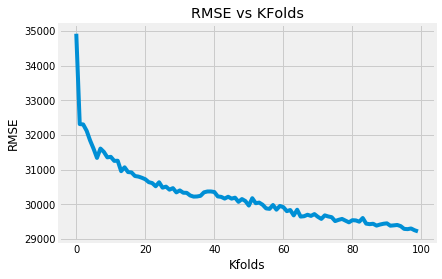

In [17]:
data = pd.read_csv("AmesHousing.txt", delimiter='\t')

transformed_data = transform_features(data, percent_missing=0.05)
final_data = select_features(transformed_data, 0.4, 10)

results = []
for i in range(100):
    result = train_and_test2(final_data, k=i)
    results.append(result)
    
x = [i for i in range(100)]
y = results 
plt.plot(x, y)
plt.xlabel('Kfolds')
plt.ylabel('RMSE')
plt.title('RMSE vs KFolds')
plt.savefig('rmse.png')

min_rmse = min(results)

print(results.index(min_rmse), min_rmse)

Our error is actually the lowest, when k = 99. We can see the average RMSE goes down as we increase the number of folds. This makes sense as the RMSE shown on the graph above is an average of the cross validation tests. A larger K means we have less bias towards overestimating the model's true error. As a trade off, this requires a lot more computation time.

***That is it for now though, the goal of this project is to explore the fundamentals of Linear Regression.***